# Preparation for ColabNotebook

### Upload own kaggle API

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


### Download competition data from kaggle

In [ ]:
!kaggle competitions download -c linking-writing-processes-to-writing-quality

 94% 102M/108M [00:01<00:00, 90.3MB/s] 
100% 108M/108M [00:01<00:00, 80.1MB/s]


### Extract the compessed dataset

In [ ]:
from zipfile import ZipFile
dataset = '/content/linking-writing-processes-to-writing-quality.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# Preparation for Kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Implementation

## Data Preprocessing

* Read CSV files into DataFrames
* Modify specific columns in one of the DataFrames
* Display the first few rows of both DataFrames
* Set random seeds for reproducibility
* Handle warning messages during execution

In [ ]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import gc  # Garbage collector for memory management

import re  # Regular expression for text pattern matching
from collections import Counter  # Import Counter for counting occurrences

import random  # Module for random number generation
np.random.seed(2023)  # Set seed for reproducibility
random.seed(2023)  # Set seed for reproducibility

import warnings  # Handle warning messages
warnings.filterwarnings('ignore')  # Ignore warnings during execution

# Read the CSV file "train_logs.csv" into a Pandas DataFrame named train_logs
train_logs = pd.read_csv("train_logs.csv")
# train_logs=pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv")

# Print the length of the train_logs DataFrame
print(f"len(train_logs):{len(train_logs)}")

# Modify the 'activity' column in train_logs DataFrame
# If the activity starts with "Move From", set it to "Move From"
train_logs['activity'] = train_logs['activity'].apply(lambda x: "Move From" if x[:9] == "Move From" else x)

# Display the first few rows of the train_logs DataFrame
train_logs.head()

# Read the CSV file "train_scores.csv" into a Pandas DataFrame named train_scores
train_scores = pd.read_csv("train_scores.csv")
# train_scores=pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv")

# Print the length of the train_scores DataFrame
print(f"len(train_scores):{len(train_scores)}")

# Display the first few rows of the train_scores DataFrame
train_scores.head()

len(train_logs):8405898
len(train_scores):2471


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


* Merge `train_logs` and `train_scores` DataFrames on the 'id' column using a left join, creating a new DataFrame called `train_df`
* Print the length of the merged DataFrame `train_df`
* Display the first few rows of the merged DataFrame `train_df`
* Read the CSV file "test_logs.csv" into a Pandas DataFrame named `test_logs`
* Print the length of the `test_logs` DataFrame
* Modify the 'activity' column in the `test_logs` DataFrame, setting entries starting with "Move From" to "Move From"
* Display the first few rows of the modified `test_logs` DataFrame

In [ ]:
# Merge train_logs and train_scores DataFrames on the 'id' column using a left join
train_df = pd.merge(train_logs, train_scores, on="id", how="left")

# Print the length of the merged DataFrame train_df
print(f"len(train_df):{len(train_df)}")

# Display the first few rows of the merged DataFrame train_df
train_df.head()

# Read the CSV file "test_logs.csv" into a Pandas DataFrame named test_logs
test_logs = pd.read_csv("test_logs.csv")
# test_logs=pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv")

# Print the length of the test_logs DataFrame
print(f"len(test_logs):{len(test_logs)}")

# Modify the 'activity' column in test_logs DataFrame
# If the activity starts with "Move From", set it to "Move From"
test_logs['activity'] = test_logs['activity'].apply(lambda x: "Move From" if x[:9] == "Move From" else x)

# Display the first few rows of the test_logs DataFrame
test_logs.head()

len(train_df):8405898
len(test_logs):6


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


* Group the `train_df` DataFrame by the 'id' column
* Calculate the mean for selected columns ('down_time', 'up_time', 'action_time', 'cursor_position', 'word_count', 'score') within each group
* Create a new DataFrame called `train_logs_agg_df` with the aggregated results
* Display the first few rows of the aggregated DataFrame `train_logs_agg_df`

### Added for removing the entries with activity other than ‘Input’

Since in the 'test_logs' dataset, all entries only feature a single type of ‘activity’, namely ‘Input’.

In [ ]:
train_df = train_df[train_df.activity == 'Input']
train_df.reset_index(inplace=True, drop=True)

train_df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
1,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5
2,001519c8,6,107296,107400,104,Input,q,q,q,3,1,3.5
3,001519c8,7,107469,107596,127,Input,q,q,q,4,1,3.5
4,001519c8,8,107659,107766,107,Input,q,q,q,5,1,3.5


In [ ]:
# Group train_df DataFrame by 'id' and calculate the mean for selected columns
train_logs_agg_df = train_df.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count', 'score']].mean().reset_index()

# Display the first few rows of the aggregated DataFrame train_logs_agg_df
train_logs_agg_df.head()

,id,down_time,up_time,action_time,cursor_position,word_count,score
0,001519c8,838748.053731,838869.312935,121.259204,728.185075,127.061194,3.5
1,0022f953,449707.876677,449830.627451,122.750774,737.379773,170.880805,3.5
2,0042269b,832936.588051,833037.219061,100.631010,749.487909,195.786344,6.0
3,0059420b,801668.783742,801797.457055,128.673313,558.794479,106.336656,2.0
4,0075873a,712151.853244,712289.090628,137.237384,612.642122,125.297631,4.0


## Preprocessor

Encapsulates a set of preprocessing and feature engineering methods designed for a specific dataset with a focus on user activities and events over time

In [ ]:
from collections import defaultdict

class Preprocessor:
    """
    Class for preprocessing and feature engineering tasks.
    """

    def __init__(self, seed):
        """
        Initialize the Preprocessor with a seed and predefined lists for various activities.
        """
        self.seed = seed

        # Lists for different activities, events, text changes, punctuations, and gaps
        self.activities = ['Input', 'Remove/Cut', 'Nonproduction', 'Replace', 'Paste', 'Move From']
        self.events = ['q', 'Space', 'Backspace', 'Shift', 'ArrowRight', 'Leftclick', 'ArrowLeft', '.', ',',
                       'ArrowDown', 'ArrowUp', 'Enter', 'CapsLock', "'", 'Delete', 'Unidentified']
        self.text_changes = ['q', ' ', 'NoChange', '.', ',', '\n', "'", '"', '-', '?', ';', '=', '/', '\\', ':']
        self.punctuations = ['"', '.', ',', "'", '-', ';', ':', '?', '!', '<', '>', '/', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+']
        self.gaps = [1, 2, 3, 5, 10, 20, 50, 100]

        # Default dictionary for storing inverse document frequencies
        self.idf = defaultdict(float)


    def activity_counts(self, df):
        """
        Calculate TF-IDF weighted activity counts for each 'id' in the DataFrame.
        """
        tmp_df = df.groupby('id').agg({'activity': list}).reset_index()
        ret = list()
        for li in tmp_df['activity'].values:
            items = list(Counter(li).items())
            di = dict()

            for k in self.activities:
                di[k] = 0

            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v

            ret.append(di)

        ret = pd.DataFrame(ret)

        cols = [f'activity_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols: #a ctivity_i_count
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = np.log(df.shape[0] / (ret[col].sum() + 1))
                self.idf[col] = idf

            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf

        return ret  # TF-IDF weighted activity counts


    def event_counts(self, df, colname):
        """
        Calculate TF-IDF weighted event counts for each 'id' in the DataFrame.
        """
        tmp_df = df.groupby('id').agg({colname: list}).reset_index()
        ret = list()
        for li in tmp_df[colname].values:
            items = list(Counter(li).items())
            di = dict()
            for k in self.events:
                di[k] = 0
            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v
            ret.append(di)
        ret = pd.DataFrame(ret)
        cols = [f'{colname}_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols:
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = df.shape[0] / (ret[col].sum() + 1)
                idf = np.log(idf)
                self.idf[col] = idf

            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf

        return ret


    def text_change_counts(self, df):
        """
        Calculate TF-IDF weighted text change counts for each 'id' in the DataFrame.
        """
        tmp_df = df.groupby('id').agg({'text_change': list}).reset_index()
        ret = list()
        for li in tmp_df['text_change'].values:
            items = list(Counter(li).items())
            di = dict()
            for k in self.text_changes:
                di[k] = 0
            for item in items:
                k, v = item[0], item[1]
                if k in di:
                    di[k] = v
            ret.append(di)
        ret = pd.DataFrame(ret)
        cols = [f'text_change_{i}_count' for i in range(len(ret.columns))]
        ret.columns = cols

        cnts = ret.sum(1)

        for col in cols:
            if col in self.idf.keys():
                idf = self.idf[col]
            else:
                idf = df.shape[0] / (ret[col].sum() + 1)
                idf = np.log(idf)
                self.idf[col] = idf

            ret[col] = 1 + np.log(ret[col] / cnts)
            ret[col] *= idf

        return ret


    def match_punctuations(self, df):
        """
        Count the occurrences of punctuations in the 'down_event' column for each 'id'.
        """
        tmp_df = df.groupby('id').agg({'down_event': list}).reset_index()
        ret = list()
        for li in tmp_df['down_event'].values:
            cnt = 0
            items = list(Counter(li).items())
            for item in items:
                k, v = item[0], item[1]
                if k in self.punctuations:
                    cnt += v
            ret.append(cnt)
        ret = pd.DataFrame({'punct_cnt': ret})
        return ret


    def get_input_words(self, df):
        """
        Extract information related to input words, such as counts, lengths, and statistics.
        """

        tmp_df = df[(~df['text_change'].str.contains('=>'))&(df['text_change'] != 'NoChange')].reset_index(drop=True)
        tmp_df = tmp_df.groupby('id').agg({'text_change': list}).reset_index()
        tmp_df['text_change'] = tmp_df['text_change'].apply(lambda x: ''.join(x))
        tmp_df['text_change'] = tmp_df['text_change'].apply(lambda x: re.findall(r'q+', x))
        tmp_df['input_word_count'] = tmp_df['text_change'].apply(len)
        tmp_df['input_word_length_mean'] = tmp_df['text_change'].apply(lambda x: np.mean([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df['input_word_length_max'] = tmp_df['text_change'].apply(lambda x: np.max([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df['input_word_length_std'] = tmp_df['text_change'].apply(lambda x: np.std([len(i) for i in x] if len(x) > 0 else 0))
        tmp_df.drop(['text_change'], axis=1, inplace=True)
        return tmp_df


    def make_feats(self, df):
        """
        Perform feature engineering on the input DataFrame and return the resulting features.
        """
        print("Starting to engineer features")

        feats = pd.DataFrame({'id': df['id'].unique().tolist()})

        print("Engineering time data")
        for gap in self.gaps:
            print(f"-> for gap {gap}")
            df[f'up_time_shift{gap}'] = df.groupby('id')['up_time'].shift(gap)
            df[f'action_time_gap{gap}'] = df['down_time'] - df[f'up_time_shift{gap}']
        df.drop(columns=[f'up_time_shift{gap}' for gap in self.gaps], inplace=True)


        print("Engineering cursor position data")
        for gap in self.gaps:
            print(f"-> for gap {gap}")
            df[f'cursor_position_shift{gap}'] = df.groupby('id')['cursor_position'].shift(gap)
            df[f'cursor_position_change{gap}'] = df['cursor_position'] - df[f'cursor_position_shift{gap}']

            df[f'cursor_position_abs_change{gap}'] = np.abs(df[f'cursor_position_change{gap}'])
        df.drop(columns=[f'cursor_position_shift{gap}' for gap in self.gaps], inplace=True)


        print("Engineering word count data")
        for gap in self.gaps:
            print(f"-> for gap {gap}")
            df[f'word_count_shift{gap}'] = df.groupby('id')['word_count'].shift(gap)
            df[f'word_count_change{gap}'] = df['word_count'] - df[f'word_count_shift{gap}']
            df[f'word_count_abs_change{gap}'] = np.abs(df[f'word_count_change{gap}'])
        df.drop(columns=[f'word_count_shift{gap}' for gap in self.gaps], inplace=True)

        print("Engineering statistical summaries for features")

        feats_stat = [
            ('event_id', ['max']),
            ('up_time', ['max']),
            ('action_time', ['max', 'min', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew', pd.DataFrame.kurt]),
            ('activity', ['nunique']),
            ('down_event', ['nunique']),
            ('up_event', ['nunique']),
            ('text_change', ['nunique']),
            ('cursor_position', ['nunique', 'max', 'quantile', 'sem', 'mean']),
            ('word_count', ['nunique', 'max', 'quantile', 'sem', 'mean'])]

        for gap in self.gaps:
            feats_stat.extend([
                (f'action_time_gap{gap}', ['max', 'min', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew', pd.DataFrame.kurt]),
                (f'cursor_position_change{gap}', ['max', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew', pd.DataFrame.kurt]),
                (f'word_count_change{gap}', ['max', 'mean', 'std', 'quantile', 'sem', 'sum', 'skew', pd.DataFrame.kurt])
            ])

        pbar = feats_stat
        for item in pbar:
            colname, methods = item[0], item[1]
            for method in methods:
                if isinstance(method, str):
                    method_name = method
                else:
                    method_name = method.__name__
                tmp_df = df.groupby(['id']).agg({colname: method}).reset_index().rename(columns={colname: f'{colname}_{method_name}'})
                feats = feats.merge(tmp_df, on='id', how='left')

        print("Engineering activity counts data")
        tmp_df = self.activity_counts(df)
        feats = pd.concat([feats, tmp_df], axis=1)

        print("Engineering event counts data")
        tmp_df = self.event_counts(df, 'down_event')
        feats = pd.concat([feats, tmp_df], axis=1)
        tmp_df = self.event_counts(df, 'up_event')
        feats = pd.concat([feats, tmp_df], axis=1)

        print("Engineering text change counts data")
        tmp_df = self.text_change_counts(df)
        feats = pd.concat([feats, tmp_df], axis=1)

        print("Engineering punctuation counts data")
        tmp_df = self.match_punctuations(df)
        feats = pd.concat([feats, tmp_df], axis=1)

        # input words
        print("Engineering input words data")
        tmp_df = self.get_input_words(df)
        feats = pd.merge(feats, tmp_df, on='id', how='left')

        # compare feats
        print("Engineering ratios data")
        feats['word_time_ratio'] = feats['word_count_max'] / feats['up_time_max']
        feats['word_event_ratio'] = feats['word_count_max'] / feats['event_id_max']
        feats['event_time_ratio'] = feats['event_id_max']  / feats['up_time_max']
        feats['idle_time_ratio'] = feats['action_time_gap1_sum'] / feats['up_time_max']

        print("Done!")
        return feats

* An instance of the Preprocessor class is created with a seed value of 2023
* The method `make_feats` is called on the training data (train_logs) using the preprocessor instance
* The resulting features are stored in the train_feats DataFrame
* The method `make_feats` is called on the test data (test_logs), and the resulting features are stored in the `test_feats` DataFrame
* Statistical features are aggregated for the training data (train_logs) using the groupby method on the 'id' column
* The aggregation includes mean, standard deviation, minimum, maximum, last, first, standard error of the mean (sem), median, and sum for columns ['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']
* The resulting DataFrame is named `train_agg_fe_df`

In [ ]:
# Create an instance of the Preprocessor class with a seed value
preprocessor = Preprocessor(seed=2023)

# Engineering features for training data
print("Engineering features for training data")
train_feats = preprocessor.make_feats(train_logs)
print("-" * 25)

# Engineering features for test data
print("Engineering features for test data")
test_feats = preprocessor.make_feats(test_logs)

# Aggregate statistical features for training data
train_agg_fe_df = train_logs.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']].agg(['mean', 'std', 'min', 'max', 'last', 'first', 'sem', 'median', 'sum'])
train_agg_fe_df.columns = ['_'.join(x) for x in train_agg_fe_df.columns]
train_agg_fe_df = train_agg_fe_df.add_prefix("tmp_")
train_agg_fe_df.reset_index(inplace=True)
train_agg_fe_df.head()

Engineering features for training data
Starting to engineer features
Engineering time data
-> for gap 1
-> for gap 2
-> for gap 3
-> for gap 5
-> for gap 10
-> for gap 20
-> for gap 50
-> for gap 100
Engineering cursor position data
-> for gap 1
-> for gap 2
-> for gap 3
-> for gap 5
-> for gap 10
-> for gap 20
-> for gap 50
-> for gap 100
Engineering word count data
-> for gap 1
-> for gap 2
-> for gap 3
-> for gap 5
-> for gap 10
-> for gap 20
-> for gap 50
-> for gap 100
Engineering statistical summaries for features
Engineering activity counts data
Engineering event counts data
Engineering text change counts data
Engineering punctuation counts data
Engineering input words data
Engineering ratios data
Done!
-------------------------
Engineering features for test data
Starting to engineer features
Engineering time data
-> for gap 1
-> for gap 2
-> for gap 3
-> for gap 5
-> for gap 10
-> for gap 20
-> for gap 50
-> for gap 100
Engineering cursor position data
-> for gap 1
-> for gap 2

,id,tmp_down_time_mean,tmp_down_time_std,tmp_down_time_min,tmp_down_time_max,tmp_down_time_last,tmp_down_time_first,tmp_down_time_sem,tmp_down_time_median,tmp_down_time_sum,...,tmp_cursor_position_sum,tmp_word_count_mean,tmp_word_count_std,tmp_word_count_min,tmp_word_count_max,tmp_word_count_last,tmp_word_count_first,tmp_word_count_sem,tmp_word_count_median,tmp_word_count_sum
0,001519c8,848180.771998,395112.665961,4526,1801877,1801877,4526,7813.679400,891716.0,2168798234,...,1818445,128.116152,76.498372,0,256,255,0,1.512819,132.0,327593
1,0022f953,518855.347596,384959.404177,30623,1788842,1788842,30623,7771.013336,407673.0,1273271023,...,1904809,182.714751,97.763090,0,323,320,0,1.973502,186.0,448382
2,0042269b,828491.775145,489500.796565,4441,1771219,1771219,4441,7611.375322,759582.0,3426641982,...,3025946,194.772727,108.935068,0,404,404,0,1.693860,193.0,805580
3,0059420b,785483.026350,385205.014399,41395,1404394,1404394,41395,9765.334758,848240.5,1222211589,...,844188,103.618895,61.882250,0,206,206,0,1.568777,108.5,161231
4,0075873a,713354.197550,405576.409034,78470,1662390,1662390,78470,8061.699636,686588.0,1805499474,...,1518729,125.082971,77.255054,0,252,252,0,1.535610,113.0,316585


Prepare a DataFrame (test_agg_fe_df) with aggregated statistical features for each 'id' in the test dataset, contributing to a comprehensive set of features for subsequent analysis or modeling

In [ ]:
# Aggregate statistical features for test data
test_agg_fe_df = test_logs.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']].agg(['mean', 'std', 'min', 'max', 'last', 'first', 'sem', 'median', 'sum'])
test_agg_fe_df.columns = ['_'.join(x) for x in test_agg_fe_df.columns]
test_agg_fe_df = test_agg_fe_df.add_prefix("tmp_")
test_agg_fe_df.reset_index(inplace=True)
test_agg_fe_df.head()

,id,tmp_down_time_mean,tmp_down_time_std,tmp_down_time_min,tmp_down_time_max,tmp_down_time_last,tmp_down_time_first,tmp_down_time_sem,tmp_down_time_median,tmp_down_time_sum,...,tmp_cursor_position_sum,tmp_word_count_mean,tmp_word_count_std,tmp_word_count_min,tmp_word_count_max,tmp_word_count_last,tmp_word_count_first,tmp_word_count_sem,tmp_word_count_median,tmp_word_count_sum
0,0000aaaa,549253.0,298144.503219,338433,760073,760073,338433,210820.0,549253.0,1098506,...,1,0.0,0.000000,0,0,0,0,0.0,0.0,0
1,2222bbbb,501229.0,298012.981358,290502,711956,290502,711956,210727.0,501229.0,1002458,...,1,1.0,0.000000,1,1,1,1,0.0,1.0,2
2,4444cccc,410271.5,318587.667370,184996,635547,184996,635547,225275.5,410271.5,820543,...,1,0.5,0.707107,0,1,1,0,0.5,0.5,1


Extend the feature set by incorporating additional metrics related to latency and pauses based on the time differences between 'down_time' and the lagged 'up_time'. The results are stored in the `train_eD592674` and `test_eD592674` DataFrames for further analysis

In [ ]:
# Merge aggregated statistical features with the engineered features for training and test data
train_feats = train_feats.merge(train_agg_fe_df, on='id', how='left')
test_feats = test_feats.merge(test_agg_fe_df, on='id', how='left')

# Initialize a list to store data for additional features
data = []

# Iterate through both training and test logs
for logs in [train_logs, test_logs]:

    # Lag the 'up_time' column and fill missing values with 'down_time'
    logs['up_time_lagged'] = logs.groupby('id')['up_time'].shift(1).fillna(logs['down_time'])

    # Calculate the time difference in seconds between 'down_time' and lagged 'up_time'
    logs['time_diff'] = abs(logs['down_time'] - logs['up_time_lagged']) / 1000

    # Group by 'id' for further calculations
    group = logs.groupby('id')['time_diff']

    # Calculate various latency-related metrics
    largest_lantency = group.max()
    smallest_lantency = group.min()
    median_lantency = group.median()

    initial_pause = logs.groupby('id')['down_time'].first() / 1000

    pauses_half_sec = group.apply(lambda x: ((x > 0.5) & (x <= 1)).sum())
    pauses_1_sec = group.apply(lambda x: ((x > 1) & (x <= 1.5)).sum())
    pauses_1_half_sec = group.apply(lambda x: ((x > 1.5) & (x <= 2)).sum())
    pauses_2_sec = group.apply(lambda x: ((x > 2) & (x <= 3)).sum())
    pauses_3_sec = group.apply(lambda x: (x > 3).sum())

    # Append the calculated metrics to the data list
    data.append(pd.DataFrame({
        'id': logs['id'].unique(),

        'largest_lantency': largest_lantency,
        'smallest_lantency': smallest_lantency,
        'median_lantency': median_lantency,
        'initial_pause': initial_pause,
        'pauses_half_sec': pauses_half_sec,
        'pauses_1_sec': pauses_1_sec,
        'pauses_1_half_sec': pauses_1_half_sec,
        'pauses_2_sec': pauses_2_sec,
        'pauses_3_sec': pauses_3_sec,
    }).reset_index(drop=True))

# Separate the data list into training and test sets
train_eD592674, test_eD592674 = data

# Perform garbage collection to free up memory
gc.collect()

30

* Integrate the engineered features, additional latency-related features, and scores, creating a comprehensive set of features for the training and test datasets
* The resulting DataFrames, `train_feats` and `test_feats`, are now ready for further analysis or modeling

In [ ]:
# Merge additional latency-related features with the engineered features for training and test data
train_feats = train_feats.merge(train_eD592674, on='id', how='left')
test_feats = test_feats.merge(test_eD592674, on='id', how='left')

# Merge scores with the final training feature set
train_feats = train_feats.merge(train_scores, on='id', how='left')

## Modeling

### Design regression tasks

* The LightGBM model is trained and evaluated using cross-validation with the specified parameters
* The OOF RMSE scores and trained models are stored for further analysis

In [ ]:
# Import necessary libraries
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Initialize LabelEncoder
le = LabelEncoder()

# Transform 'score' into numerical labels using LabelEncoder
train_feats['score_class'] = le.fit_transform(train_feats['score'])
# convert to one-hot encode

# Define target and drop columns
target_col = ['score']
drop_cols = ['id', 'score_class']

# Select columns for training
train_cols = [col for col in train_feats.columns if col not in target_col + drop_cols]
# col of x

# Initialize dictionaries and lists for model storage and scoring
models_dict = {}
scores = []
test_predict_list = []

# Best hyperparameters obtained from tuning
best_params = {'reg_alpha': 0.007678095440286993,
               'reg_lambda': 0.34230534302168353,
               'colsample_bytree': 0.627061253588415,
               'subsample': 0.854942238828458,
               'learning_rate': 0.038697981947473245,
               'num_leaves': 22,
               'max_depth': 37,
               'min_child_samples': 18}

# Loop through 5 different seeds
for i in range(5):
    # Initialize KFold cross-validation
    kf = model_selection.KFold(n_splits=10, random_state=2023 + i, shuffle=True)

    # Initialize array for out-of-fold (OOF) predictions
    oof_valid_preds = np.zeros(train_feats.shape[0], )

    # Extract test features
    X_test = test_feats[train_cols]

    # Loop through folds in KFold
    for fold, (train_idx, valid_idx) in enumerate(kf.split(train_feats)):
        print("==-"*50)
        print("Fold : ", fold)

        # Split data into training and validation sets
        X_train, y_train = train_feats.iloc[train_idx][train_cols], train_feats.iloc[train_idx][target_col]
        X_valid, y_valid = train_feats.iloc[valid_idx][train_cols], train_feats.iloc[valid_idx][target_col]

        # Define LGBMRegressor parameters
        params = {
            "objective": "regression",
            "metric": "rmse",
            'random_state': 2023,
            "n_estimators" : 12001,
            "verbosity": -1,
            **best_params
        }

        # Initialize LGBMRegressor model
        model = lgb.LGBMRegressor(**params)

        # Define early stopping and verbose callbacks
        early_stopping_callback = lgb.early_stopping(200, first_metric_only=True, verbose=False)
        verbose_callback = lgb.log_evaluation(100)

        # Fit the model on training data
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
                  callbacks=[early_stopping_callback, verbose_callback],
        )

        # Make predictions on the validation set
        valid_predict = model.predict(X_valid)
        oof_valid_preds[valid_idx] = valid_predict

        # Make predictions on the test set and store them
        test_predict = model.predict(X_test)
        test_predict_list.append(test_predict)

        # Calculate RMSE score for the fold
        score = metrics.mean_squared_error(y_valid, valid_predict, squared=False)
        print("Fold RMSE Score : ", score)

        # Store the trained model in the dictionary
        models_dict[f'{fold}_{i}'] = model

    # Calculate OOF RMSE score
    oof_score = metrics.mean_squared_error(train_feats[target_col], oof_valid_preds, squared=False)
    scores.append(oof_score)
    print("OOF RMSE Score : ", oof_score)

==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-
Fold :  0
[100]	valid_0's rmse: 0.577015
[200]	valid_0's rmse: 0.581709
Fold RMSE Score :  0.574570385830084
==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-
Fold :  1
[100]	valid_0's rmse: 0.64385
[200]	valid_0's rmse: 0.644552
[300]	valid_0's rmse: 0.644125
Fold RMSE Score :  0.6432121163184086
==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-
Fold :  2
[100]	valid_0's rmse: 0.646557
[200]	valid_0's rmse: 0.644044
[300]	valid_0's rmse: 0.641597
[400]	valid_0's rmse: 0.639409
[500]	valid_0's rmse: 0.640955
Fold RMSE Score :  0.6390167505886463
==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==

### Visualizing

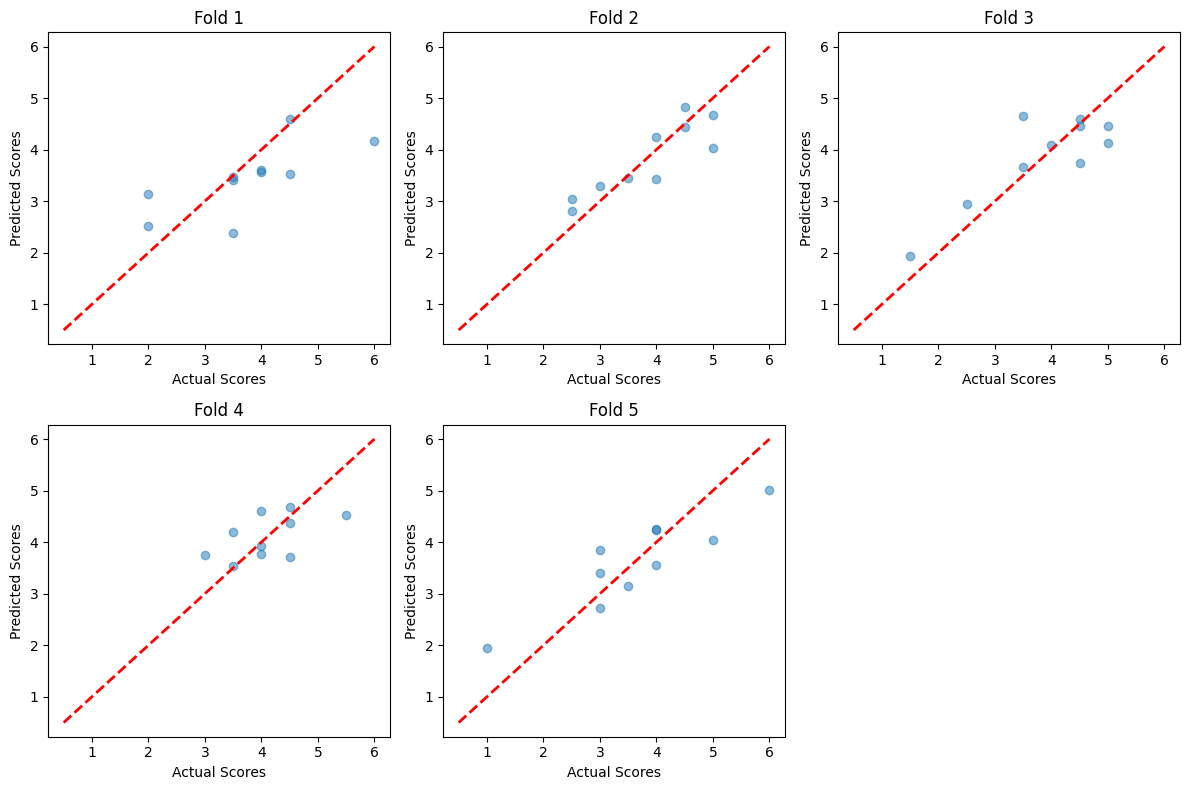

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted scores for each fold
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    fold_start = i * 10
    fold_end = (i + 1) * 10
    plt.scatter(train_feats.iloc[fold_start:fold_end][target_col].values.flatten(),
                oof_valid_preds[fold_start:fold_end],
                alpha=0.5)
    plt.plot([min(train_feats[target_col].values.flatten()), max(train_feats[target_col].values.flatten())],
             [min(train_feats[target_col].values.flatten()), max(train_feats[target_col].values.flatten())],
             linestyle='--', color='red', linewidth=2)
    plt.title(f'Fold {i+1}')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')

plt.tight_layout()
plt.show()

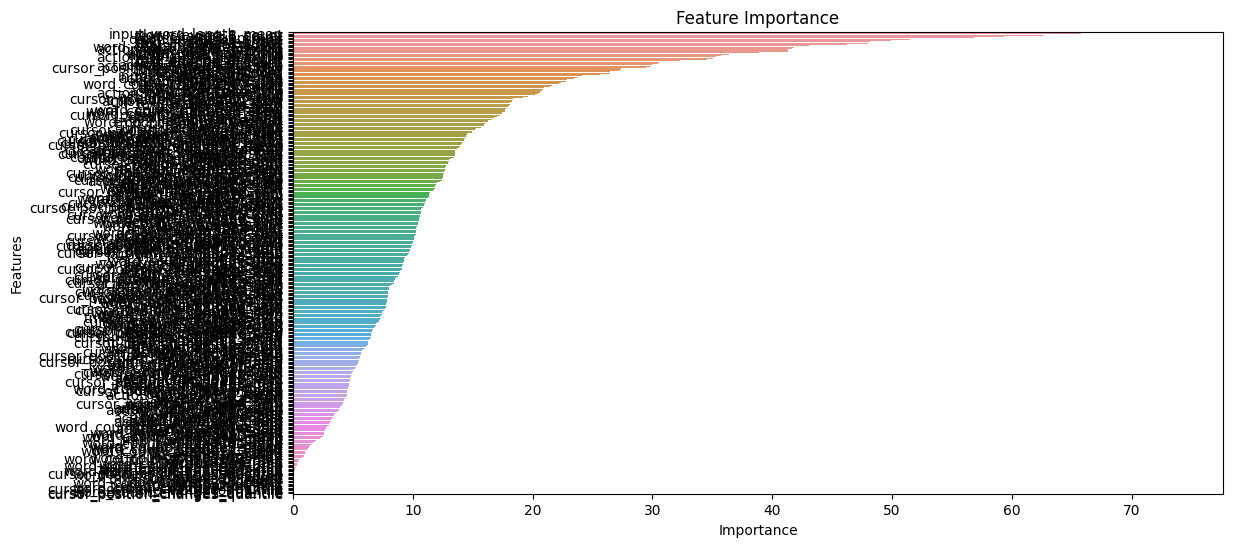

In [ ]:
plt.figure(figsize=(12, 6))
feature_importance = np.zeros(X_train.shape[1])
for model in models_dict.values():
    feature_importance += model.feature_importances_

feature_importance /= len(models_dict)
sorted_idx = np.argsort(feature_importance)[::-1]

sns.barplot(x=feature_importance[sorted_idx], y=np.array(train_cols)[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

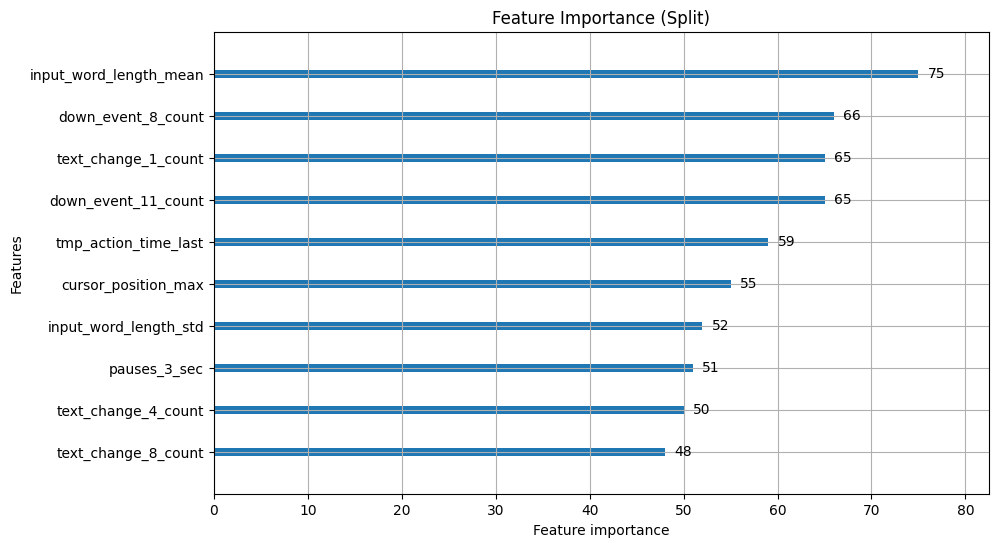

In [ ]:
lgb.plot_importance(model, max_num_features=10, figsize=(10, 6), importance_type='split')
plt.title('Feature Importance (Split)')
plt.show()

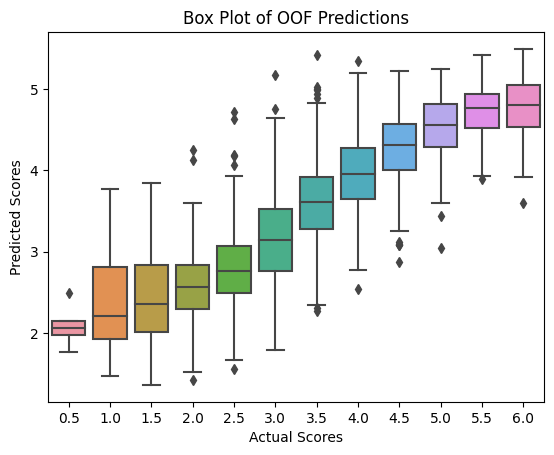

In [ ]:
sns.boxplot(x=train_feats['score'], y=oof_valid_preds)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Box Plot of OOF Predictions')
plt.show()

## Save as CSV file for submission

In [ ]:
# Calculate the mean of test predictions and assign it to 'score' column in test_feats
test_feats['score'] = np.mean(test_predict_list, axis=0)

# Save the 'id' and 'score' columns to a CSV file for submission
test_feats[['id', 'score']].to_csv("submission.csv", index=False)